In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
df = pd.read_csv("spam.csv",encoding='latin')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
851,ham,"I am real, baby! I want to bring out your inne...",NaN,NaN,NaN
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...,NaN,NaN,NaN
451,ham,Thanks for this hope you had a good day today,NaN,NaN,NaN
3561,ham,Still chance there. If you search hard you wil...,NaN,NaN,NaN
1895,ham,"Uh, heads up we don't have THAT much left",NaN,NaN,NaN


## data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.sample(6)

,v1,v2
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...
3659,ham,I will reach ur home in &lt;#&gt; minutes
682,ham,Is xy going 4 e lunch?
4407,ham,Take care and sleep well.you need to learn to ...
2349,ham,Yar else i'll thk of all sorts of funny things.
3789,ham,I love you !!! You know? Can you feel it? Does...


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [7]:
df.sample(6)

,target,text
794,ham,There generally isn't one. It's an uncountable...
1837,ham,And how's your husband.
2657,ham,Dai &lt;#&gt; naal eruku.
3230,ham,No plm i will come da. On the way.
3155,ham,Long time. You remember me today.
2672,ham,Super msg da:)nalla timing.


In [8]:
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

## EDA

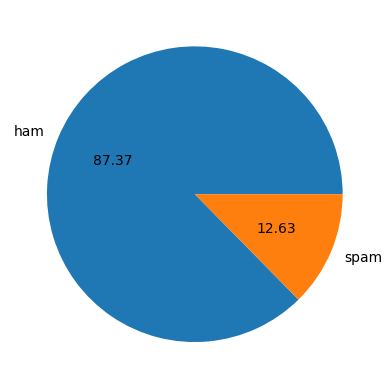

In [15]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['text'].apply(len)

In [18]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

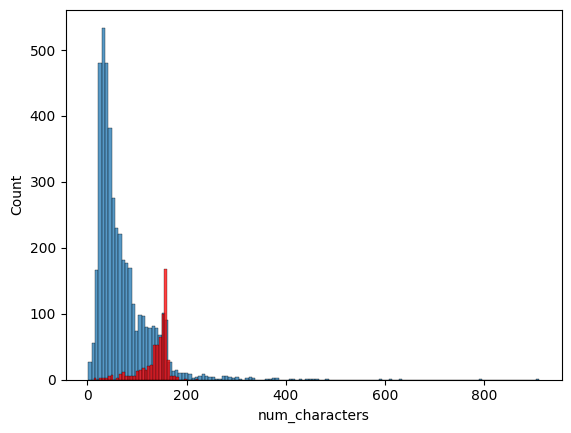

In [25]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

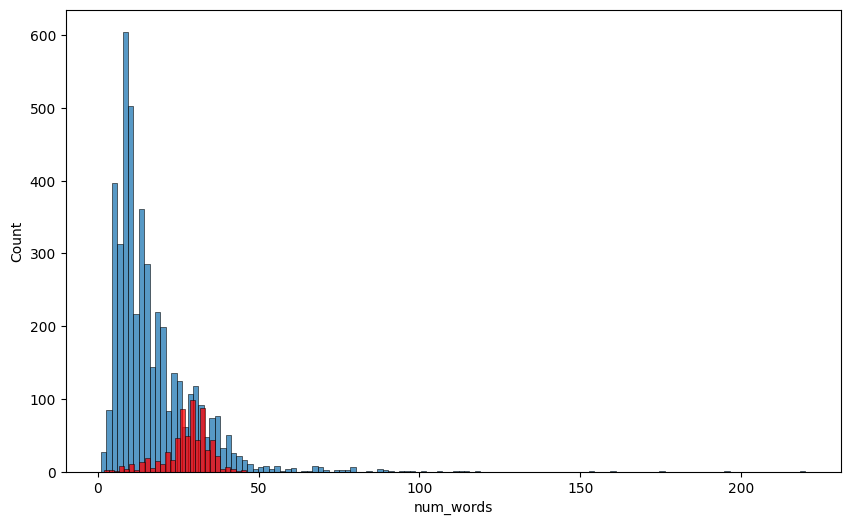

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

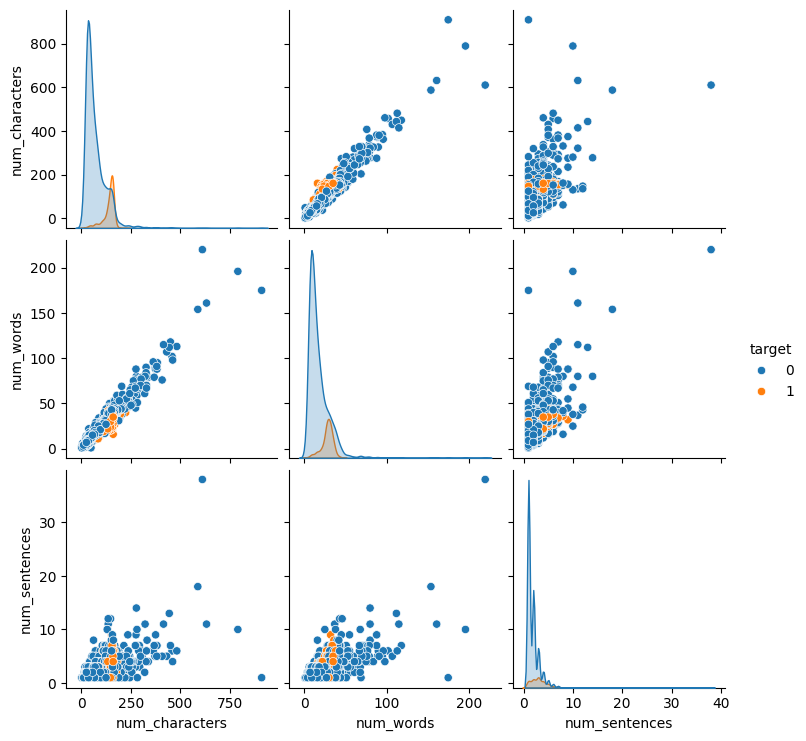

In [27]:
sns.pairplot(df,hue='target')

<Axes: >

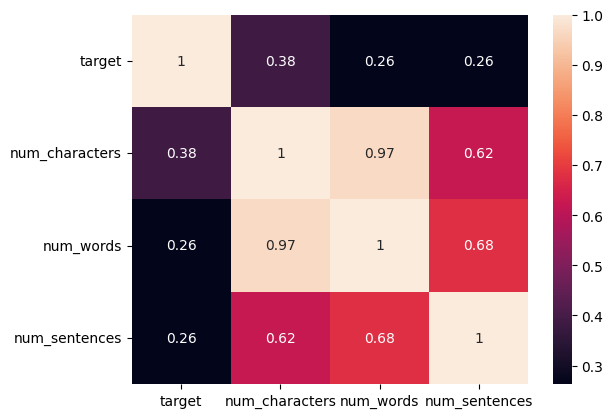

In [28]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(), annot=True)

## preprocessing

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [54]:
ps = PorterStemmer()
def transform_text(text):
    # lower case
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)
    
    # removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # removing stop word and puntuation   
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # stemming
    text = y[:]
    y.clear()                
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [55]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [56]:
df['transformed_text'] = df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [69]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

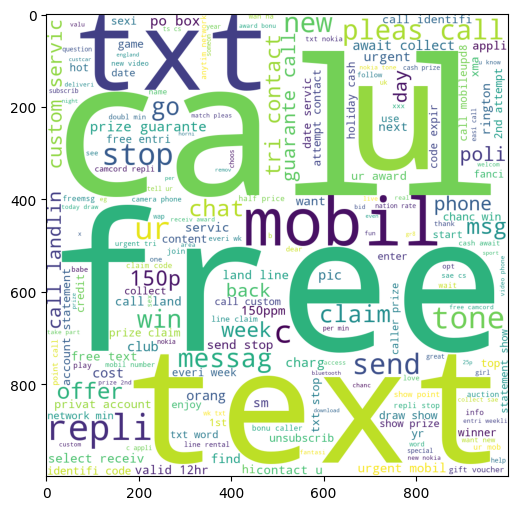

In [72]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [73]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

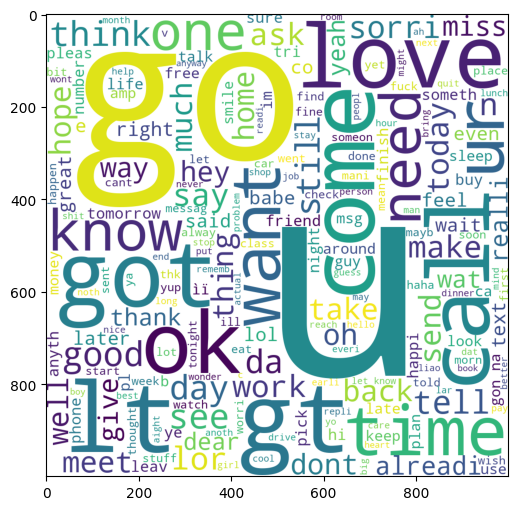

In [74]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

## Model building

In [106]:
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [122]:
X = tfid.fit_transform(df['transformed_text']).toarray()

In [117]:
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [81]:
y = df['target'].values

In [82]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [85]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(cross_val_score(gnb, X, y, cv=5,scoring='precision'))

0.8597678916827853
[[778 121]
 [ 24 111]]
0.47844827586206895
[0.48333333 0.46818182 0.49528302 0.48717949 0.47247706]


In [125]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(cross_val_score(mnb, X, y, cv=5,scoring='precision'))

0.9613152804642167
[[899   0]
 [ 40  95]]
1.0
[1.         1.         1.         1.         0.96190476]


In [126]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(cross_val_score(bnb, X, y, cv=5,scoring='precision'))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491
[0.97560976 0.96491228 0.97435897 0.97345133 1.        ]


In [ ]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))